<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220620_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. 합성곱 신경망CNN

##4-1 합성곱 신경망

- 데이터가 가진 특징들의 패턴을 학습하는 알고리즘. 컴퓨터 비전 분야
- 이미지 분류: 이미지를 인식할 수 있는 능력
- 객체 탐지: 이미지에서 특정 객체를 인식하고 위치까지 파악해 어떤 클래스에 속하는지 분류 확률과 예측 파악
    - 일반적으로 객체의 이미지는 좌표 값이기 때문에, 경계 박스를 찾는 문제는 회귀
    - 클래스를 예측하는 문제는 분류


###4-1-1 이미지 표현
- 컬러이미지: RGB 세 채널로 구성된 3장의 이미지를 겹쳐 표현 (0~255)

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


###4-1-2 합성곱Convolution

: 입력 치미지에 대해 일반적으로 정방형 크기를 가지는 kernel을 사용하여, 입력 이미지에 대한 특성을 추출하는 ㅏㅇ법

- 특성맵: 합성곱 연산을 통해 추출된 이미지
- element-wise 곱셈 연산 후 모두 더한 값으로 단일 스칼라 값 출력
- 오차 역전파 시 커널의 가중치 업데이트
- 공유 가중치 때문에 합성곱 신경망이 이미지 특성 추출에 효율적
- 커널의 gradient 계산 시 완전 연결층보다 연산량이 훨씬 적음

###4-1-3 채널Channel

: 입력 이미지를 구성하는 2차원 배열의 개수
- 컬러이미지의 shape: (가로, 세로, 3)
- 입력 이미지의 채널 개수만큼 커널이 생성. 각 채널마다 하나씩 커널을 적용해 합성곱 연산 수행 -> element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 추출
- 커널 = 커널 사이즈 X 입력 채널 개수 X 출력 필터 개수
- bias: 출력 필터 개수만큼 추가됨

###4-1-4 스트라이드Stride

: 커널이 좌측 상단부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채울 때, 이동 간격 (주로 1 or 2)

- 1로 설정: 우측으로 1픽셀씩 이동해 끝에 도달하면, 아래 방향으로 1칸 좌측 첫 픽셀로 이동
- 2로 설정: 특성맵의 크기가 1/2로 감소
- 텐서플로 케라스의 Conv2D 레이어의 strides 매개변수에 지정

###4-1-5 패딩Padding

: 추출된 특성맵의 크기가 입력 이미지의 크기와 동일하게 출력되기 하는 방법
- 일반적으로 zero-padding 사용. 입력 이미지의 가장 자리에 0으로 채우고 추출, 패딩 후 합성곱 연산 수행하면 크기 보존
- padding='same'으로 설정
- default) padding = 'valid'

###4-1-6 특성맵Feature map 사이즈

: 패딩과 스트라이드 적용 후 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식


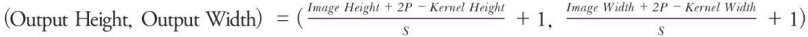

- image height, image width: 입력 크기(input size)
- kernel hight, kernel width: 필터 크기(kernel size)
- s: stride
- p: padding
- output height, output width: 출력 크기(ouput size)

###4-1-7 풀링pooling

: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 이미지 축소로 연산량 감소
- 과대적합 방지

1. max pooling
    - 특징이 큰 값이 다른 특징을 대표
2. average pooling

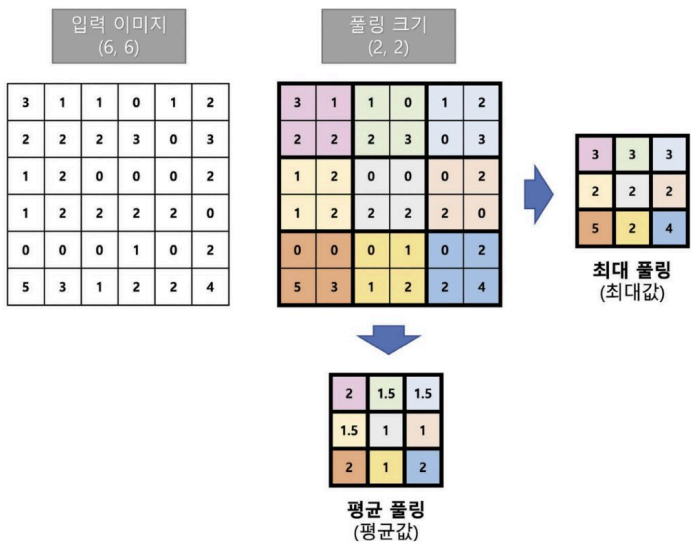

##4-2 간단한 모델 생성

###4-2-1 데이터 로드 및 전처리

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


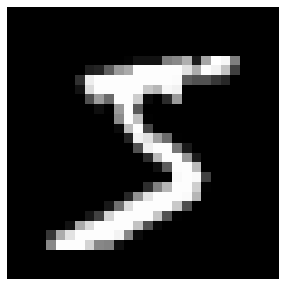

In [ ]:
import matplotlib.pyplot as plt

def plot_image(data, idx):
    plt.figure(figsize = (5, 5))
    plt.imshow(data[idx], cmap='gray')
    plt.axis('off')
    plt.acorr

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# Normalization

x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- CNN 모델에 주입하기 위해 색상 채널 추가
    - (60000, 28, 28) -> (60000, 28, 28, 1)

In [ ]:
#채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


###4-2-2 Sequential API 모델 생성 및 학습

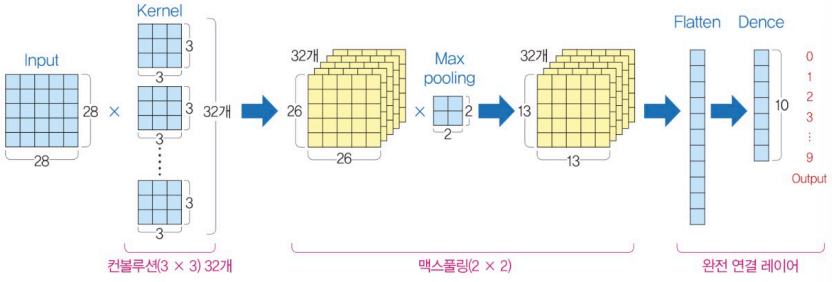

- 합성곱 레이어 1개, 풀링 레이어 1개 모델
- 최종 분류기 Dense 레이어를 위해 Flatten 층 추가 (1차원 배열로 변환)
- 합성곱: Conv2D 레이어, (3, 3) 크기의 32가지 종류의 커널 적용
- 활성화 함수: ReLU
- name = 'conv'
- 풀링 레이어 (2, 2), 최대 풀링 적용
- 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수=10
- 분류 클래스 10개인 다중 분류이므로 활성화 함수 softmax

In [ ]:
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

옵티마이저, 손실함수, 평가지표를 설정해 주고 컴파일 -> 모델 인스턴스 생성

- fit()에 훈련, 검증 세트 주입 & epoch=10으로 지정 -> epoch 당 손실과 평가 결과 출력

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2243 - accuracy: 0.9363 - val_loss: 0.0875 - val_accuracy: 0.9745
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0823 - accuracy: 0.9761 - val_loss: 0.0674 - val_accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 0.0583 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0490 - accuracy: 0.9854 - val_loss: 0.0560 - val_accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0540 - val_accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9901 - val_loss: 0.0536 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0571 - val_accuracy

- evaluate() 메소드를 모델 인스턴스에 적용하면 모델의 학습된 가중치를 사용하여 손실과 평가지표 계산 - 약 98%

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0524 - accuracy: 0.9854


[0.05242093652486801, 0.9854000210762024]

- 훈련 결과는 history 객체에 저장.

- 훈련 셋의 손실: 계속 감소
- 검증 셋의 손실: 4 epoch 이후부터는 모델이 과대적합되어 더 이상 낮아지지 않는다.

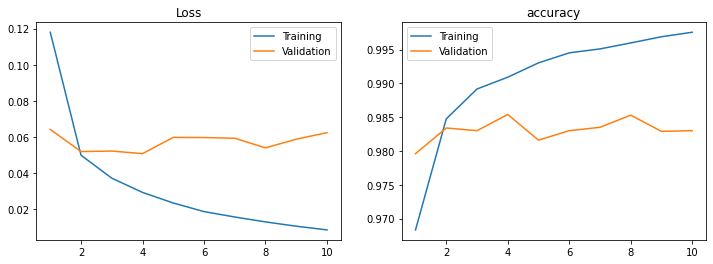

In [59]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('accuracy')

    plt.show()

plot_loss_acc(history, 10)

###4-2-3 모델 구조 파악


- 레이어의 이름, 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터(가중치) 개수 알 수 있음.

    - (28,28,1) --Conv2D--> (26,26,32)

- (3,3) 크기의 합성곱 필터를 사용해 이미지 크기가 2씩 감소 (패딩 적용X)

- 서로 다른 32개의 필터 사용 -> (26,26) 크기의 특성맵이 32개 생성.

    => (28,28,1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 피처(특징)를 추출하는 것.

- (2,2) 크기의 풀링 레이어를 적용했기 때문에 이미지 크기의 1/2인 (13,13,32) 텐서로 변환.

- Flatten 층에서 3차원 텐서를 1차원 텐서로 펼치면 5408개(13, 13, 32) 원소를 갖는 1차원 벡터

In [ ]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- 생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서 추출
- 앞에 있는 축(axis=0)의 None) 배치 크기가 들어오는 위치로서 배치 크기로 어떤 값이든 가능

In [ ]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

- output 속성으로 모델의 출력 센터 선택

- 10개의 node를 갖는 1차원 벡터

In [ ]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
# 레이어 
model.layers

In [ ]:
# 첫번째 레이어 선택
model.layers[0]

- 앞의 Conv2D 레이어에는 모델 입력 데이터가 그대로 들어가기 때문에 (None, 28,28,1) 형태

In [ ]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

- 각 레이어의 가중치 행렬 추천
- weights 속성을 각 레이어 인스턴스에 적용
- con/kernel:0) 커널(합성곱 필터) 행렬의 가중치
- conv/bias:0) 커널의 상수항(bias)

In [ ]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.30652842,  0.2894213 ,  0.23596185, -0.9298804 ,
            0.06394362, -1.2432479 , -0.7897956 , -0.05499823,
           -0.78771   , -0.06834324,  0.31017366,  0.20454085,
           -0.0871699 , -1.2665997 ,  0.19976145,  0.3402419 ,
            0.20834659, -0.56766695,  0.25974488,  0.29036042,
            0.2296978 ,  0.3030917 , -0.6849062 ,  0.34233478,
            0.06207248, -0.6318842 ,  0.20180379,  0.25556046,
           -0.417921  ,  0.39463204, -0.64088076,  0.67299664]],
 
         [[-0.30370313,  0.34188363,  0.09032051, -0.7179574 ,
            0.21473867,  0.02270844, -0.01177926, -0.6318808 ,
           -0.3291641 ,  0.27209365,  0.48301467, -0.28621343,
            0.6942729 , -1.1309897 ,  0.20670193, -0.547222  ,
            0.28746444, -0.41314134,  0.03289875,  0.13449016,
            0.19972606,  0.32615027,  0.13756266,  0.24203472,
            0.38506407, -0.11022794, -0.11

커널 가중치의 shape: (3, 3, 1, 32)

    필터의 크기: (3, 3)
    
    입력층의 채널 개수: (1)
    
    출력층의 채널 개수: (32)

- layer[0] 커널의 학습(업데이트) 가능한 파라미터 개수는 3 X 3 X 1 X 32 = 288개

- 상수항의 가중치 shape: (,32) = 출력층의 채널 수

-> layer[0] 커널의 총 학습(업데이트) 가능한 파라미터: 288 + 32 = 320

In [ ]:
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.30652842,  0.2894213 ,  0.23596185, -0.9298804 ,
           0.06394362, -1.2432479 , -0.7897956 , -0.05499823,
          -0.78771   , -0.06834324,  0.31017366,  0.20454085,
          -0.0871699 , -1.2665997 ,  0.19976145,  0.3402419 ,
           0.20834659, -0.56766695,  0.25974488,  0.29036042,
           0.2296978 ,  0.3030917 , -0.6849062 ,  0.34233478,
           0.06207248, -0.6318842 ,  0.20180379,  0.25556046,
          -0.417921  ,  0.39463204, -0.64088076,  0.67299664]],

        [[-0.30370313,  0.34188363,  0.09032051, -0.7179574 ,
           0.21473867,  0.02270844, -0.01177926, -0.6318808 ,
          -0.3291641 ,  0.27209365,  0.48301467, -0.28621343,
           0.6942729 , -1.1309897 ,  0.20670193, -0.547222  ,
           0.28746444, -0.41314134,  0.03289875,  0.13449016,
           0.19972606,  0.32615027,  0.13756266,  0.24203472,
           0.38506407, -0.11022794, -0.11025507, -0.048735

In [ ]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-1.22046791e-01, -3.30872715e-01, -3.40751231e-01, -1.71484984e-02,
       -6.96110278e-02,  2.90929191e-02, -1.39386430e-01, -5.92024717e-03,
       -6.90259039e-02, -2.29131375e-02, -2.23091558e-01, -1.46694565e-02,
       -1.39643094e-02,  2.26288453e-01, -3.63870084e-01, -2.80080318e-01,
       -6.27163518e-03, -8.94170105e-02, -3.38232547e-01, -3.03490222e-01,
       -2.99865901e-01, -3.48063946e-01, -1.24379553e-01,  8.01336858e-03,
       -6.23904504e-02, -1.45410493e-01, -2.18801618e-01, -3.13543469e-01,
       -1.40151054e-01, -1.64341480e-01, -1.99254036e-01,  1.78096321e-04],
      dtype=float32)>

In [ ]:
model.get_layer('conv') #레이어의 이름으로 레이어 선택

In [ ]:
#샘플 이미지의 레이어별 출력을 리스트에 추가
activator = tf.keras.Model(inputs = model.input,
                           outputs = [layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

2

- 2개의 출력 텐서 중 첫 번째 텐서는 Conv2D 레이어의 출력
- 텐서 형태: (1, 26, 26, 32)에서 1은 입력 이미지의 개수 = 샘플 1개

In [ ]:
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

- 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화

- 출력 이미지의 특징이 각각 다름

    -> 커널은 입력 이미지로부터 서로 다른 피처(특징)를 추출하는 역할

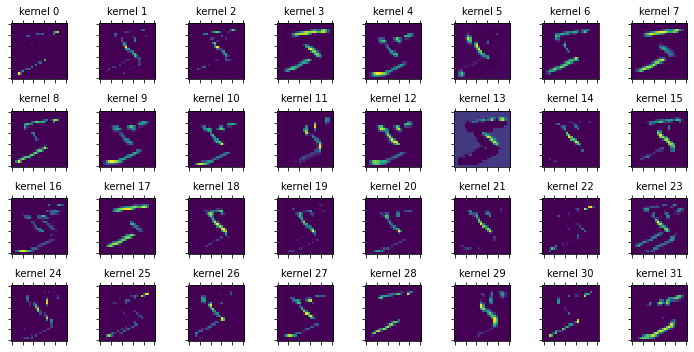

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

- 두 번째 레이어: 최대 풀링 레이어

In [ ]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


- 앞서 Conv2D 출력 이미지에 비하여 화소 크기가 굵어짐

- 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있음.

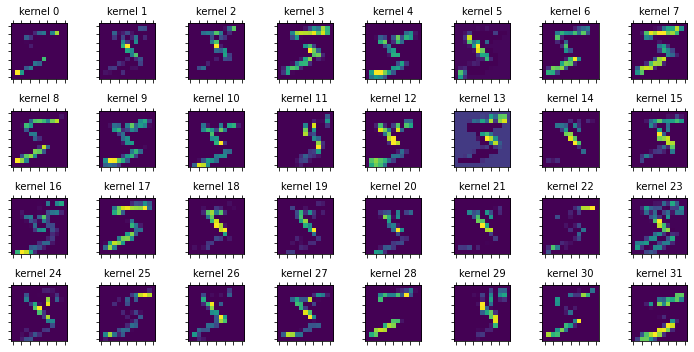

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

##4-3. 복잡한 모델 생성
1. 각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델 생성

2. 중간에 있는 레이어를 건너뛰고 뒤쪽에 있는 레이어로 출력텐서를 전달하는 방식으로 직접 연결

###4-3-1 데이터셋 준비

In [ ]:
import tensorflow as tf
import numpy as np

- x: 0~9 숫자를 손글씨로 쓴 이미지
- y: 정답

In [ ]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- y_odd: 홀수인지 짝수인지를 판단
- y_train_odd: y_train 값이 홀수면 1, 짝수면 0으로 하는 배열

In [ ]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

- 원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열 동시에 출력해 비교

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


- 검증 데이터 셋에 대해서도 홀짝을 나타내는 y_valid_odd 배열 생성

In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

- 색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 지정.

- 텐서플로의 expand_dims() 함수에 원본 배열을 입력하고, 새롭게 추가하려는 축의 인덱스를 지정하면 해당 인덱스에 새로운 축 추가
- 축의 인덱스로 -1을 지정했기 때문에 새로운 축은 끝에 추가되어 (60000,28,28) -> (60000,28,28,1)

In [ ]:
#Normalization
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


###4-3-2. Functional API로 다중 입력, 다중 출력 레이어 생성
: 다중 입력/다중 출력 같은 구조 만들 수 있음

- inputs: Conv2D 레이어와 Flatten 레이어의 입력으로 사용
- 따라서, 입력 레이어는 2개의 출력을 가짐 
- 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용되고
- 최종적으로 Concatenate 레이어에서 합쳐진 다음에 Dense 레이어를 통과한다.

In [ ]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

In [ ]:
#!wget https://bootstrap.pypa.io/ez_setup.py -O - | sudo python
#!pip install mock --upgrade
#!pip install six --upgrade

--2022-06-20 04:46:13--  https://bootstrap.pypa.io/ez_setup.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12537 (12K) [text/x-python]
Saving to: ‘STDOUT’

-                   100%[===================>]  12.24K  --.-KB/s    in 0s      

2022-06-20 04:46:13 (25.9 MB/s) - written to stdout [12537/12537]

ez_setup.py is deprecated and when using it setuptools will be pinned to 33.1.1 since it's the last version that supports setuptools self upgrade/installation, check https://github.com/pypa/setuptools/issues/581 for more info; use pip to install setuptools
Extracting in /tmp/tmp44la3bgv
Now working in /tmp/tmp44la3bgv/setuptools-33.1.1
Installing Setuptools
running install
running bdist_egg
running egg_info
writing setuptools.egg-info/PKG-INFO
writing dependency_links to setuptools.egg-info/d

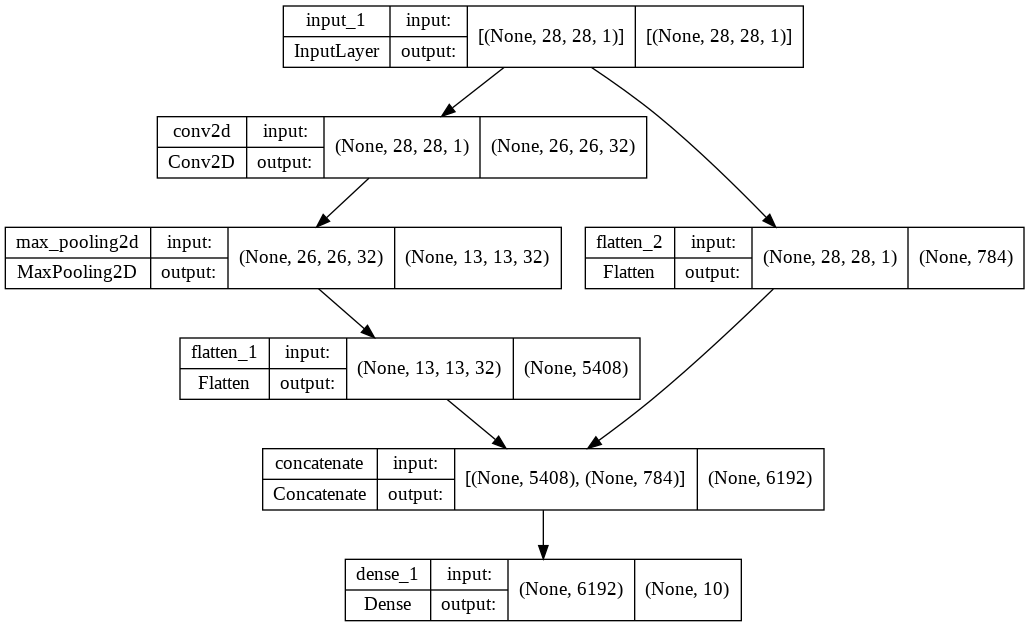

In [37]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

- 다중 분류 모델에 맞게 손실함수와 평가지표를 지정
- 옵티마이저: adam 
- 10 epoch에 대한 모델 훈련을 마치고 검증 데이터에 대한 모델의 예측 성능 평가.
- 10개의 숫자 레이블을 맞추는 모델의 정확도는 98%로 앞서 학습했던 Sequential 모델과 큰 차이는 없음.

In [38]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1939 - accuracy: 0.9442 - val_loss: 0.0799 - val_accuracy: 0.9750
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0765 - accuracy: 0.9779 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0665 - val_accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9858 - val_loss: 0.0581 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0528 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0553 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0568 - val_accuracy:

###4-3-3. 다중 출력 분류 모델
: 0~9까지의 숫자를 맞추는 분류 문제+홀짝을 맞추는 분류 문제를 동시에 풀어내는 모델 정의

- 각각 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심.

In [39]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

- 입력은 하나이고, 출력은 10개인 텐서와 1개인 텐서로 두 개가 확인

In [40]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


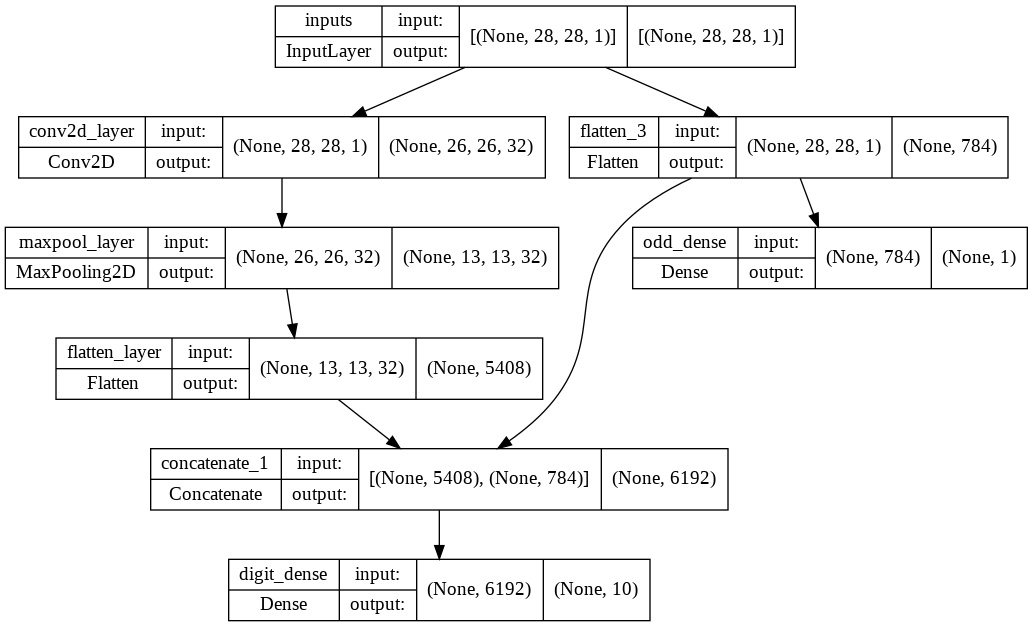

In [41]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

- 컴파일 시 주의: 지정한 이름='key', 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정

- fit() 메소드를 적용할 때도 출력 값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 함

In [42]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3635 - digit_dense_loss: 0.2018 - odd_dense_loss: 0.3233 - digit_dense_accuracy: 0.9432 - odd_dense_accuracy: 0.8645 - val_loss: 0.2270 - val_digit_dense_loss: 0.0887 - val_odd_dense_loss: 0.2766 - val_digit_dense_accuracy: 0.9737 - val_odd_dense_accuracy: 0.8867
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2123 - digit_dense_loss: 0.0766 - odd_dense_loss: 0.2714 - digit_dense_accuracy: 0.9774 - odd_dense_accuracy: 0.8914 - val_loss: 0.2033 - val_digit_dense_loss: 0.0704 - val_odd_dense_loss: 0.2659 - val_digit_dense_accuracy: 0.9780 - val_odd_dense_accuracy: 0.8943
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1907 - digit_dense_loss: 0.0594 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9822 - odd_dense_accuracy: 0.8951 - val_loss: 0.1885 - val_digit_dense_loss: 0.0590 - val_odd_dense_loss: 0.2588 - val_digit_dense_accuracy: 0.9811 - val_o

- 숫자 맞추는 문제: 98% 정확도

- 홀수 여부 판단하는 문제: 90% 정확도 
    - 레이어를 추가해 예측 정확도를 높여야.

In [43]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 1s 3ms/step - loss: 0.1928 - digit_dense_loss: 0.0649 - odd_dense_loss: 0.2557 - digit_dense_accuracy: 0.9823 - odd_dense_accuracy: 0.9013


[0.19281084835529327,
 0.06493917107582092,
 0.2557434141635895,
 0.9822999835014343,
 0.9013000130653381]

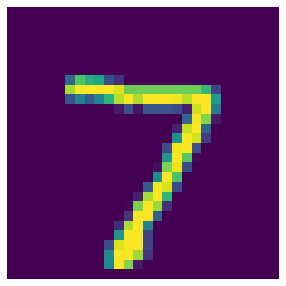

In [44]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

- 검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률을 구함.

- 첫 번째 예측값: 10개의 분류 레이블에 대한 확률

- 두 번째 예측값: 홀수일 확률

- about 숫자 7 이미지에 대한 예측 확률

In [45]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[1.8782569e-13 2.1995856e-09 6.2981209e-10 1.2031393e-06 6.7971427e-12
 9.9684238e-14 2.4797195e-21 9.9999881e-01 5.8123251e-10 1.4460531e-08]
[0.9995546]


- argmax로 예측 확률을 실제 정답 레이블로 변환

- 검증 데이터셋의 첫 10개 이미지에 대한 예측 레이블은 다음과 같고 첫 번째 이미지를 7로 예측

In [46]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

- 임계값으로 0.5를 지정: 홀수일 확률 >0.5 인 경우 홀수로 분류

- 첫 번째 이미지와 두 번째 이미지 각각 홀, 짝으로 잘 분류

In [47]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

###4-3-4. 전이학습Transfer Learning
: 앞서 훈련한 모델의 일부를 가져와 그대로 사용하고, 최종 출력층만 추가하여 모델 재구성

- 입력 레이어부터 'flatten_layer'라는 name 속성을 갖는 Flatten에 해당하는 부분을 따로 추출하여, base_model 객체 생성

- (28,28,1) 이미지를 받아서 5408개의 피처로 특징을 추출해 출력하는 모델

In [48]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


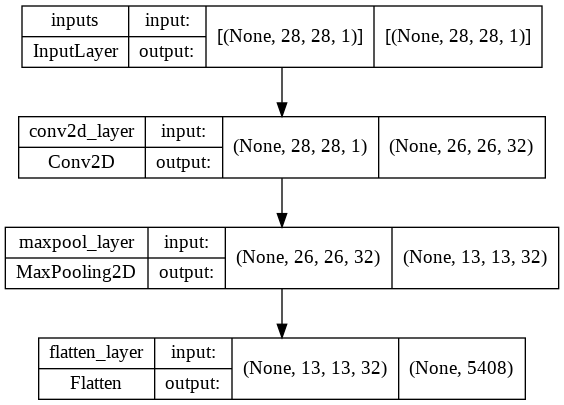

In [49]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

- 앞서 정의한 base_model을 레이어로 추가하고, 최종 분류기의 역할을 하는 Dense 레이어 추가

- 총 파라미터: 54,410개 
    - 모두 훈련 가능=모델 훈련 시 파라미터 값이 업데이트

In [50]:
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


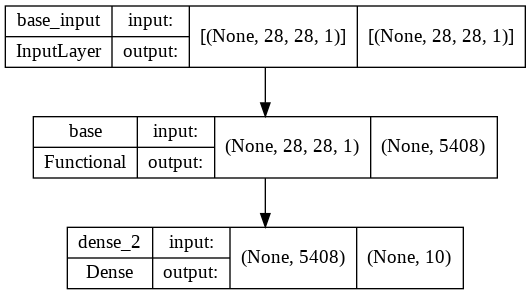

In [51]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [52]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1299 - accuracy: 0.9635 - val_loss: 0.0621 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0593 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0456 - accuracy: 0.9865 - val_loss: 0.0534 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9895 - val_loss: 0.0538 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0561 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0509 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0573 - val_accuracy:

- 모델 인스턴스는 trainable 속성을 가짐.
    - False로 지정하면 모델의 파라미터 값이 고정

- 이 방식으로 base_model_frozen을 구성하면 훈련 가능한 파라미터 개수가 0으로 확인.

In [53]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용해 구성

- 총 파라미터: 54,410개
- 앞서 고정한 320개의 파라미터는 훈련 불가

- 훈련 가능한 파라미터: Flatten 레이어의 출력 5408 + Dense 레이어의 10개 노드 사이의 가중치 
    - Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함X

In [54]:
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [55]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1154 - accuracy: 0.9689 - val_loss: 0.0547 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0512 - accuracy: 0.9850 - val_loss: 0.0535 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0505 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0521 - val_accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0581 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0599 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0550 - val_accuracy:

- 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법

    - Conv2D 레이어를 취소하고 trainable 속성을 False로 지정

In [56]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 앞서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델 구성

In [57]:
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [58]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1180 - accuracy: 0.9683 - val_loss: 0.0643 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0520 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9892 - val_loss: 0.0523 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0509 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0599 - val_accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.0598 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0594 - val_accuracy: